# **Loan Eligibility Prediction**

### **Problem Statement**
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set. 

**Key questions to answer (case study):** 

    - Which variables are significant in determining whether an applicant be eligible for a loan?
    - If the model is used instead of random prediction, how much additional profit would the business gain?

### **Business Goal** 
You are required to analyze and identify the effects of the independent variables towards the applicant's eligibility for a loan. After that, you will be required to create a model to automate the business process deciding the applicant's application whether they will or will not be eligible for a loan. The analysis will be great for management to understand the dynamics of each components towards the eligibility of an applicant's loan application and the predictive model will be highly beneficial in improving the company's efficiency.

In [1]:
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### **Step 1: Reading and Understanding the Data**

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure and quality of the data

In [2]:
loans = pd.read_csv('data/loan_data_set.csv')
loans

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# check the description and definition of each feature
data_dict = pd.read_excel('data/DataDictionary.xlsx')
data_dict

,Key Name,Description
0,Loan_ID,Unique Loan ID
1,Gender,Male/ Female
2,Married,Applicant married (Y/N)
3,Dependents,Number of dependents
4,Education,Applicant Education (Graduate/ Under Graduate)
5,Self_Employed,Self-employed (Y/N)
6,ApplicantIncome,Applicant income
7,CoapplicantIncome,Coapplicant income
8,LoanAmount,Loan amount in thousands
9,Loan_Amount_Term,Term of a loan in months


In [4]:
loans.drop('Loan_ID', axis=True, inplace=True)
loans

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
loans.describe(include='object').T

,count,unique,top,freq
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [6]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [7]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
#check for missing values (if any)
loans.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# check the baseline prediction accuracy
print("The baseline prediction accuracy: ",len(loans[loans['Loan_Status']=='Y']) / len(loans))

The baseline prediction accuracy:  0.6872964169381107


#### Inference:
- The dataset, referring to the Loan Eligibility dataset, contains 614 records (of loan applications) and 13 features
- The dataset contains a total of 8 categorical and 5 numerical variables, as shown above
- There is a number of features in the dataset contains some missing values
- Assuming we predict by random, if we assume every loan application to be eligible, we would have an accuracy rate of about 68% (this value might slightly change in a testing scenario)

### **Step 2 : Data Cleaning and Preprocessing**

##### Handle Missing Data
For the categorical features, we will fill the missing values with the mode while for the numerical features, we will fill the missing values with the average value.

In [10]:
#handle missing data
for item in loans.columns:
    if( loans[item].isna().sum() > 0 ):
        if(loans[item].dtypes == 'object'):
            loans[item] = loans[item].fillna(loans[item].mode().values[0])
        else:
            loans[item] = loans[item].fillna(int(loans[item].mean()))

loans.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##### Modify Dependents to Numerical
Though, the feature `Dependents` is shown as categorical, for better analysis, we will transform it to numerical.

In [11]:
dep = []
for item in loans['Dependents']:
    try:
        dep.append(int(item))
    except:
        dep.append(3)
loans['Dependents']= dep
loans['Dependents'].dtypes

dtype('int64')

### **Step 3: Data Analysis and Visualization**

#### Analyze the frequencies of each class (eligibile or not) in the dependent variable
- **Frequency Analysis**: checks the distribution of the categories and their relative proportions in the dataset, in order to identify class imbalance, patterns or insights.

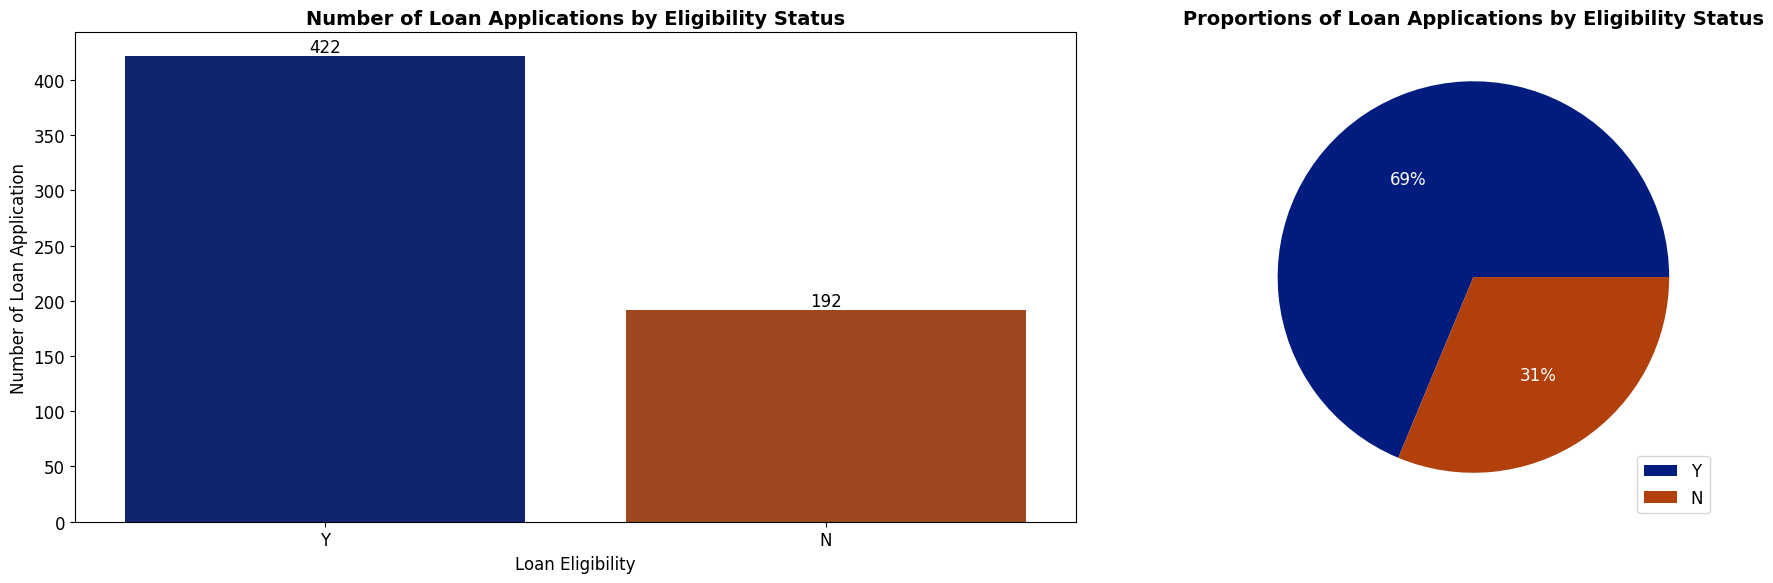

In [12]:
# plot a bar chart and a pie chart to check for amount and proportions respectively
plt.figure(figsize=(20,6))
plt.rcParams.update({'font.size': 12})

plt.subplot(1,2,1)
ax = sns.countplot(data = loans
                   , x = 'Loan_Status'
                   , palette = 'dark')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Number of Loan Applications by Eligibility Status'
          , fontsize = 14
          , fontweight='bold')
plt.grid(False)
plt.xlabel('Loan Eligibility')
plt.ylabel('Number of Loan Application')

pie_data = loans['Loan_Status'].value_counts()
plt.subplot(1,2,2)
plt.pie(pie_data.values
        , labels = pie_data.index
        , autopct='%.0f%%'
        , colors = sns.color_palette('dark')[0:2]
        , textprops={'color':'white'}
        )
plt.title('Proportions of Loan Applications by Eligibility Status'
          , fontsize = 14
          , fontweight = 'bold')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

#### Inference:
- **Frequency Analysis**: The graphs show that there are more eligible loan applications (422) than non-eligible ones (192). We can also deduce from the graphs that 69% of all loan applications were accepted. 

#### Analyze the correlation between the numerical variables
We will analyze the correlation between the numerical independent variables using a heatmap. Doing so will help us to understand more about the feature relationships, identify multicollinearity and preprocess the data moving forward.

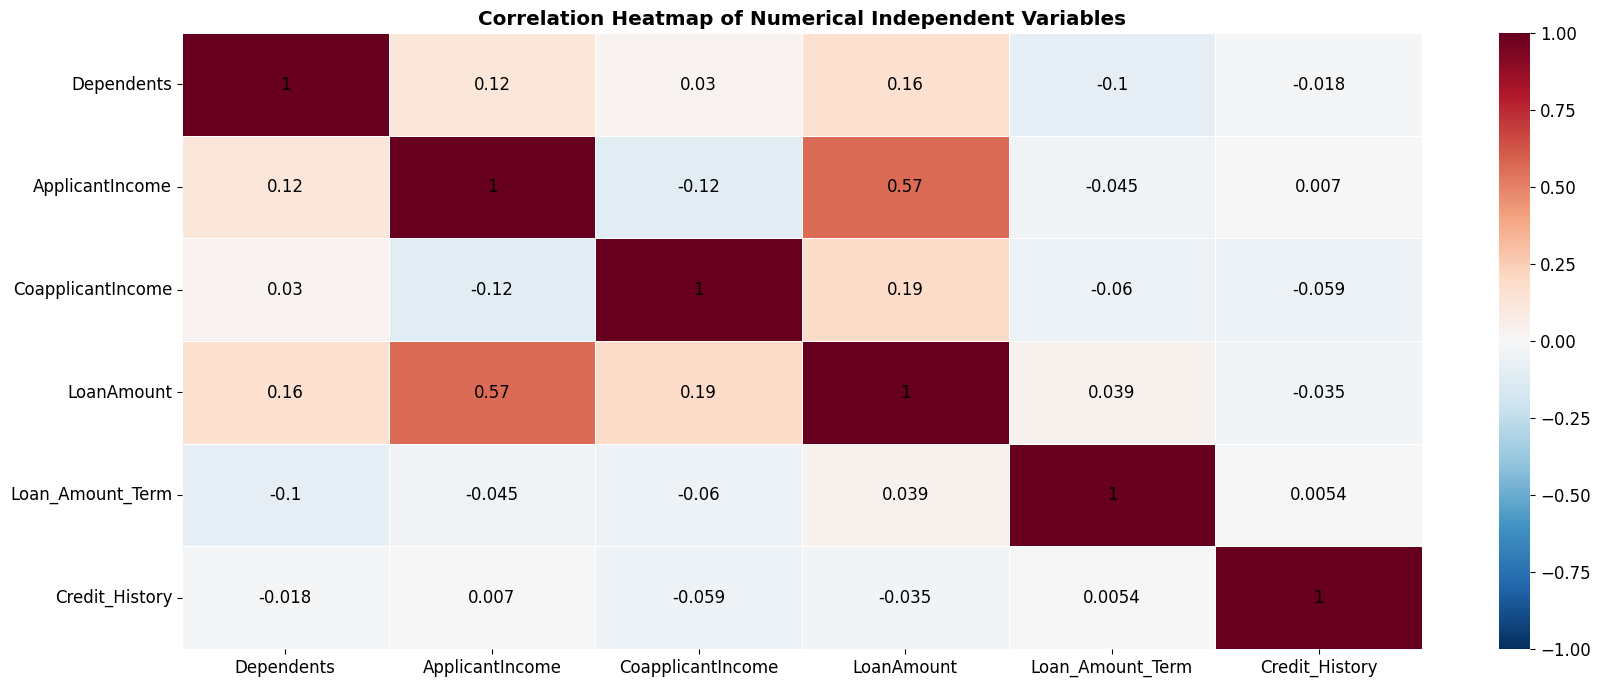

In [13]:
plt.figure(figsize=(20,8))
ax = sns.heatmap(loans.corr()
                 , annot = True
                 , cmap = 'RdBu_r'
                 , linewidths = 0.5
                 , annot_kws = {'color':'black'})
ax.collections[0].set_clim(-1,1) 
plt.title("Correlation Heatmap of Numerical Independent Variables", fontweight = 'bold')

plt.show()

#### Inference:
From the visualization above, we found that there is a strong positive correlation between the features: `LoanAmount` and `ApplicantIncome`. It tells us that applicants with higher income would more likely apply for a higher loan amount.


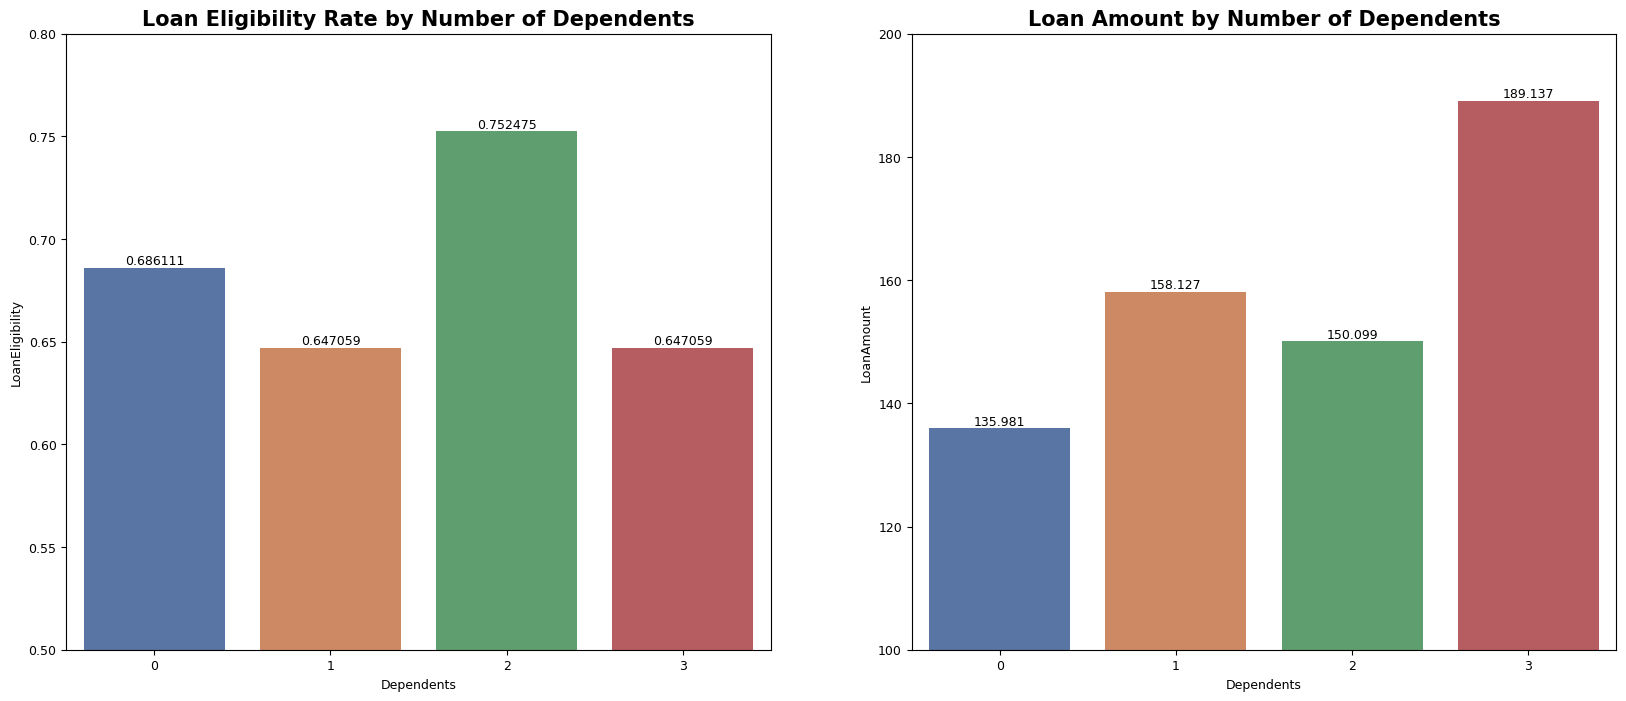

In [14]:
target_data = loans[[item for item in loans.columns]]
target_data['LoanEligibility'] = [int(item=='Y') for item in loans['Loan_Status']]

plt.rcParams.update({'font.size': 9})
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
td = target_data[['Dependents','LoanEligibility']].groupby(by='Dependents').mean().reset_index()
ax = sns.barplot(td, x = 'Dependents',y = 'LoanEligibility',palette='deep')
ax.set_ylim([0.5,0.8])
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title('Loan Eligibility Rate by Number of Dependents', fontweight = 'bold', fontsize =15)

plt.subplot(1,2,2)
td = target_data[['Dependents','LoanAmount']].groupby(by='Dependents').mean().reset_index()
ax = sns.barplot(td, x = 'Dependents',y = 'LoanAmount',palette='deep')
ax.set_ylim([100,200])
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title("Loan Amount by Number of Dependents", fontweight = 'bold', fontsize = 15)

plt.show()

#### Inference:
- From the visualizations above, we can infer that applicants with 2 dependents applied for a lower loan amount on average while having a noticably higher eligibility rate compared to those with 1 or 3 or more dependents.

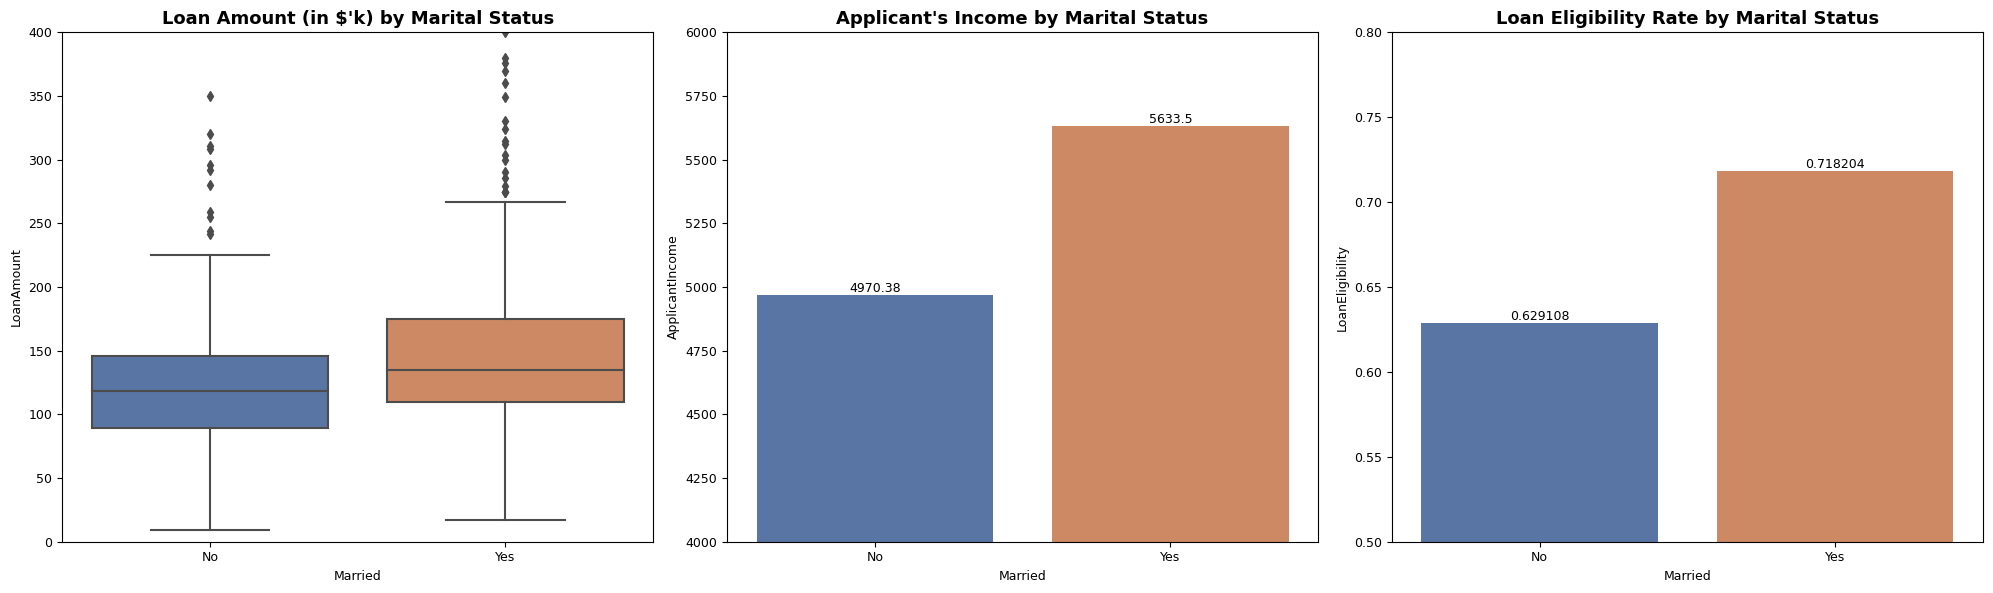

In [15]:
target_data = loans[[item for item in loans.columns]]
target_data['LoanEligibility'] = [int(item=='Y') for item in loans['Loan_Status']]

plt.rcParams.update({'font.size': 9})
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
ax= sns.boxplot(target_data, x = 'Married',y = 'LoanAmount',palette='deep')
ax.set_ylim([0,400])
ax.set_title("Loan Amount (in $'k) by Marital Status", fontweight = 'bold', fontsize = 13)

plt.subplot(1,3,2)
td = target_data[['Married','ApplicantIncome']].groupby(by='Married').mean().reset_index()
ax = sns.barplot(td, x = 'Married',y = 'ApplicantIncome',palette='deep')
ax.set_ylim([4000,6000])
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title("Applicant's Income by Marital Status", fontweight = 'bold', fontsize = 13)

plt.subplot(1,3,3)
td = target_data[['Married','LoanEligibility']].groupby(by='Married').mean().reset_index()
ax = sns.barplot(td, x = 'Married',y = 'LoanEligibility',palette='deep')
ax.set_ylim([0.5,0.8])
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title('Loan Eligibility Rate by Marital Status', fontweight = 'bold', fontsize =13)

plt.tight_layout()
plt.show()

#### Inference:
- The graphs above show us that even though, married people applied for higher loan amounts that non-married/single people, married people on average have higher incomes than non-married ones and thus, are more likely to be eligible for loans.

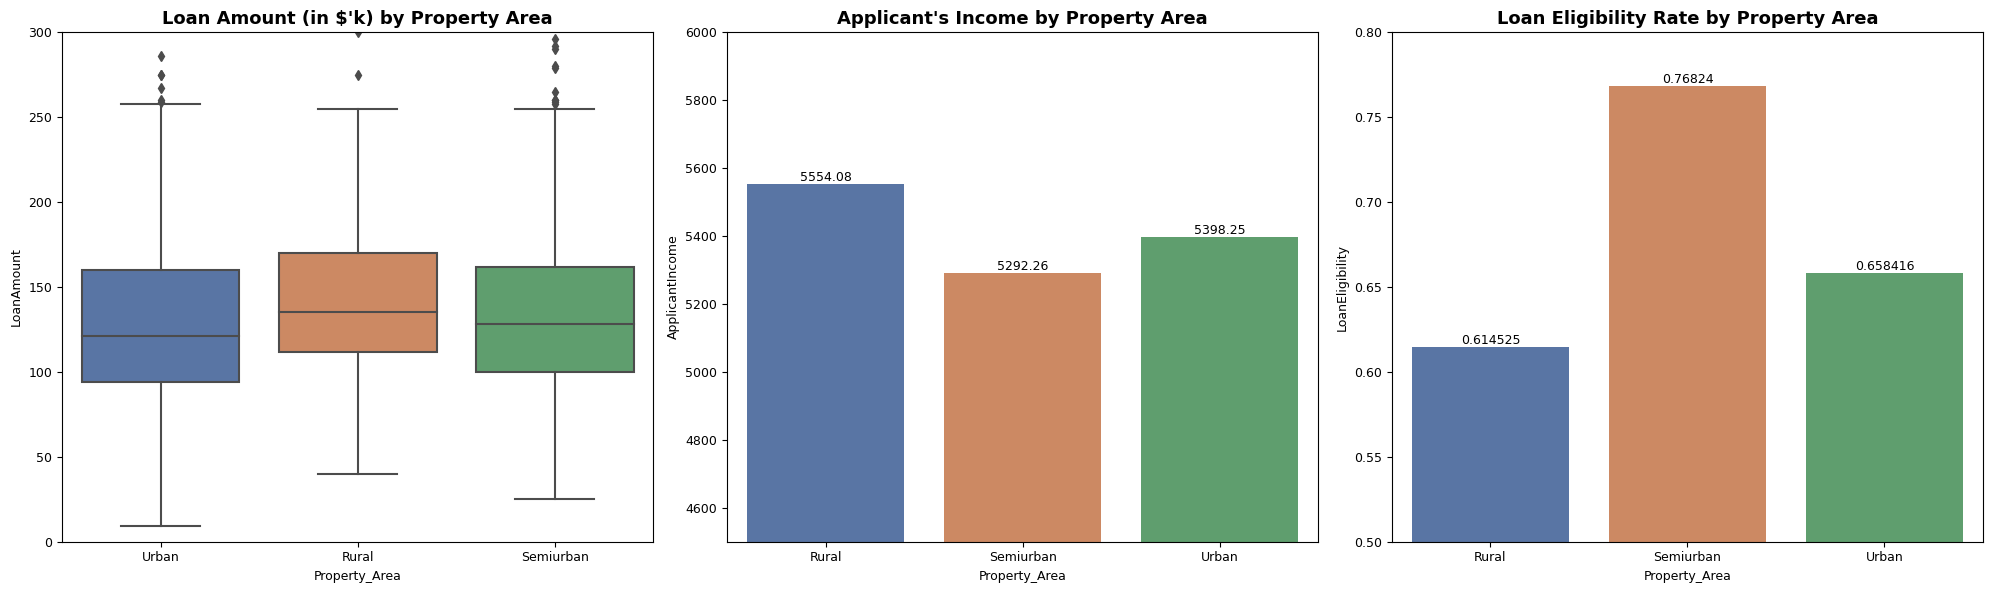

In [16]:
target_data = loans[[item for item in loans.columns]]
target_data['LoanEligibility'] = [int(item=='Y') for item in loans['Loan_Status']]

plt.rcParams.update({'font.size': 9})
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
ax= sns.boxplot(target_data, x = 'Property_Area',y = 'LoanAmount',palette='deep')
ax.set_ylim([0,300])
ax.set_title("Loan Amount (in $'k) by Property Area", fontweight = 'bold', fontsize = 13)

plt.subplot(1,3,2)
td = target_data[['Property_Area','ApplicantIncome']].groupby(by='Property_Area').mean().reset_index()
ax = sns.barplot(td, x = 'Property_Area',y = 'ApplicantIncome',palette='deep')
ax.set_ylim([4500,6000])
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title("Applicant's Income by Property Area", fontweight = 'bold', fontsize = 13)

plt.subplot(1,3,3)
td = target_data[['Property_Area','LoanEligibility']].groupby(by='Property_Area').mean().reset_index()
ax = sns.barplot(td, x = 'Property_Area',y = 'LoanEligibility',palette='deep')
ax.set_ylim([0.5,0.8])
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title('Loan Eligibility Rate by Property Area', fontweight = 'bold', fontsize =13)

plt.tight_layout()
plt.show()

#### Inference:

- From the visualizations above, we found that semiurban properties tend to be a little higher on average in prices compared to urban and rural properties as shown in the loan amounts. Despite being highest on average in prices and loan amounts, home loan applications are more likely to be eligible, if they are for properties in the semiurban areas even if the applicant's income are slightly lower. This shows that property_area has somewhat an effect on the eligibility status of a loan application.

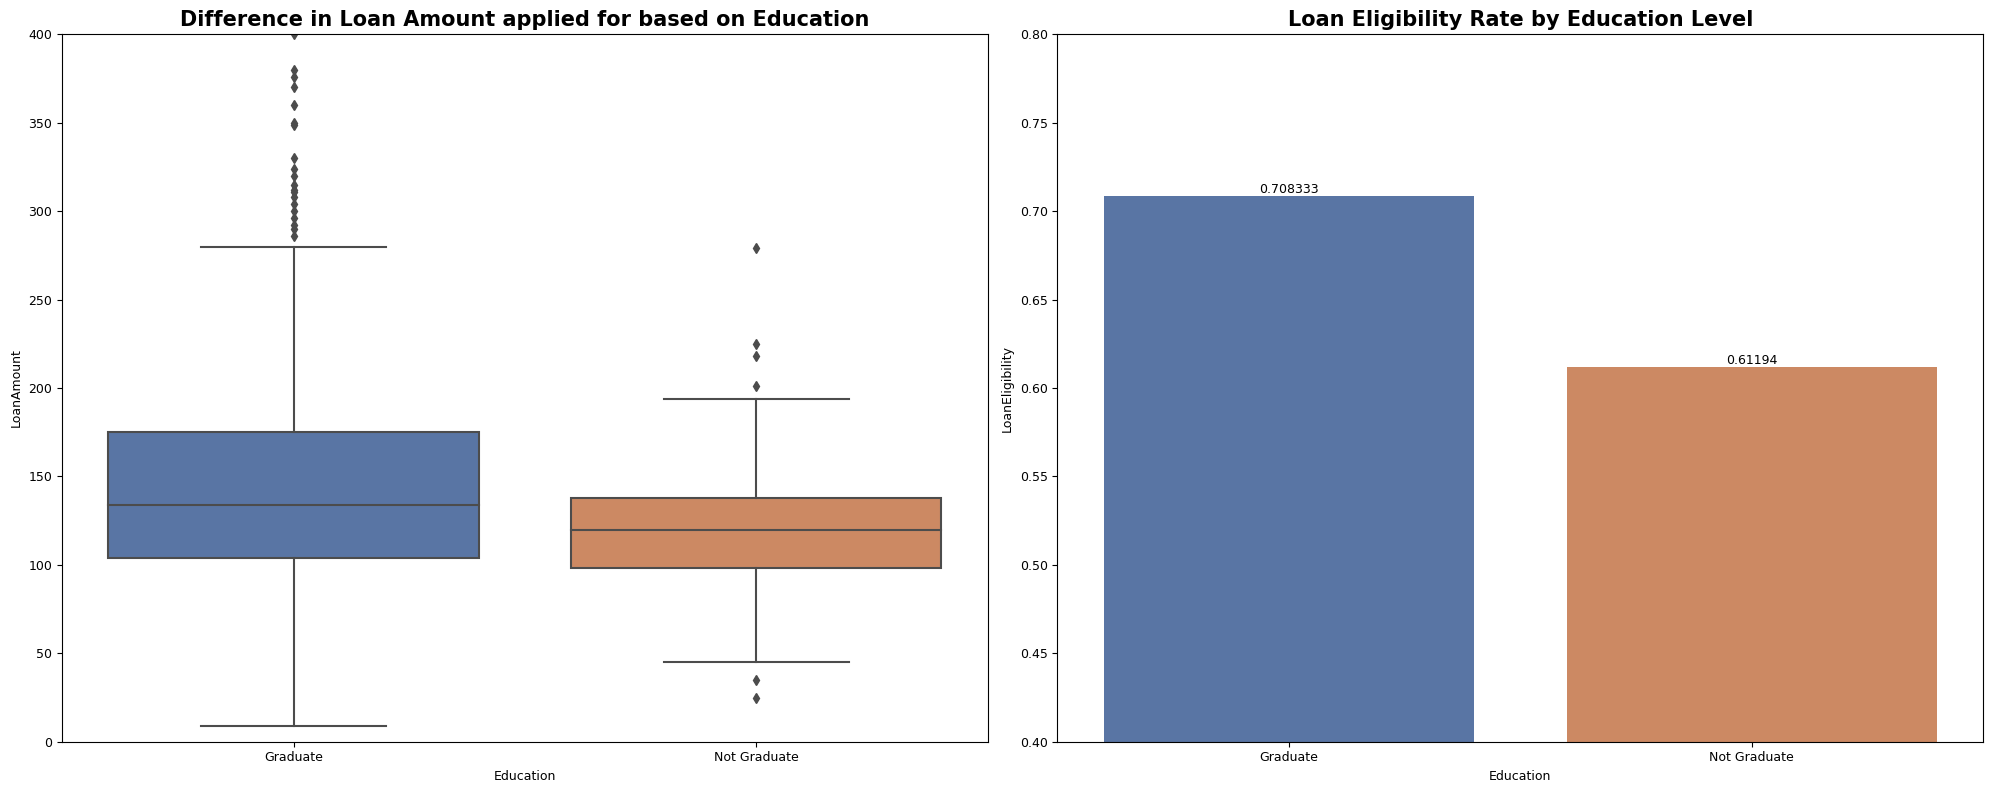

In [17]:
target_data = loans[[item for item in loans.columns]]
target_data['LoanEligibility'] = [int(item == 'Y') for item in loans['Loan_Status']]

plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 9})

plt.subplot(1,2,1)
ax= sns.boxplot(data = target_data
                ,x= 'Education'
                ,y = 'LoanAmount'
                , palette='deep')
ax.set_ylim([0,400])
plt.title("Difference in Loan Amount applied for based on Education", fontweight = 'bold', fontsize = 15)

plt.subplot(1,2,2)
td = target_data[['Education','LoanEligibility']].groupby(by='Education').mean().reset_index()
ax = sns.barplot(data=td
                 , x='Education'
                 , y="LoanEligibility", palette='deep')
ax.set_ylim([0.4,0.8])
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Loan Eligibility Rate by Education Level", fontweight='bold', fontsize = 15)

plt.tight_layout()
plt.show()

#### Inference:
- We have found that those with better education will apply for loans with higher amounts on average than those with lower education.
- Despite the higher loan amounts, graduated applicants still have a higher chance on average of being eligible for a loan than non-graduates.
- Therefore, we can deduce that applicants' education has an effect on the loan eligibility status of the applicant.

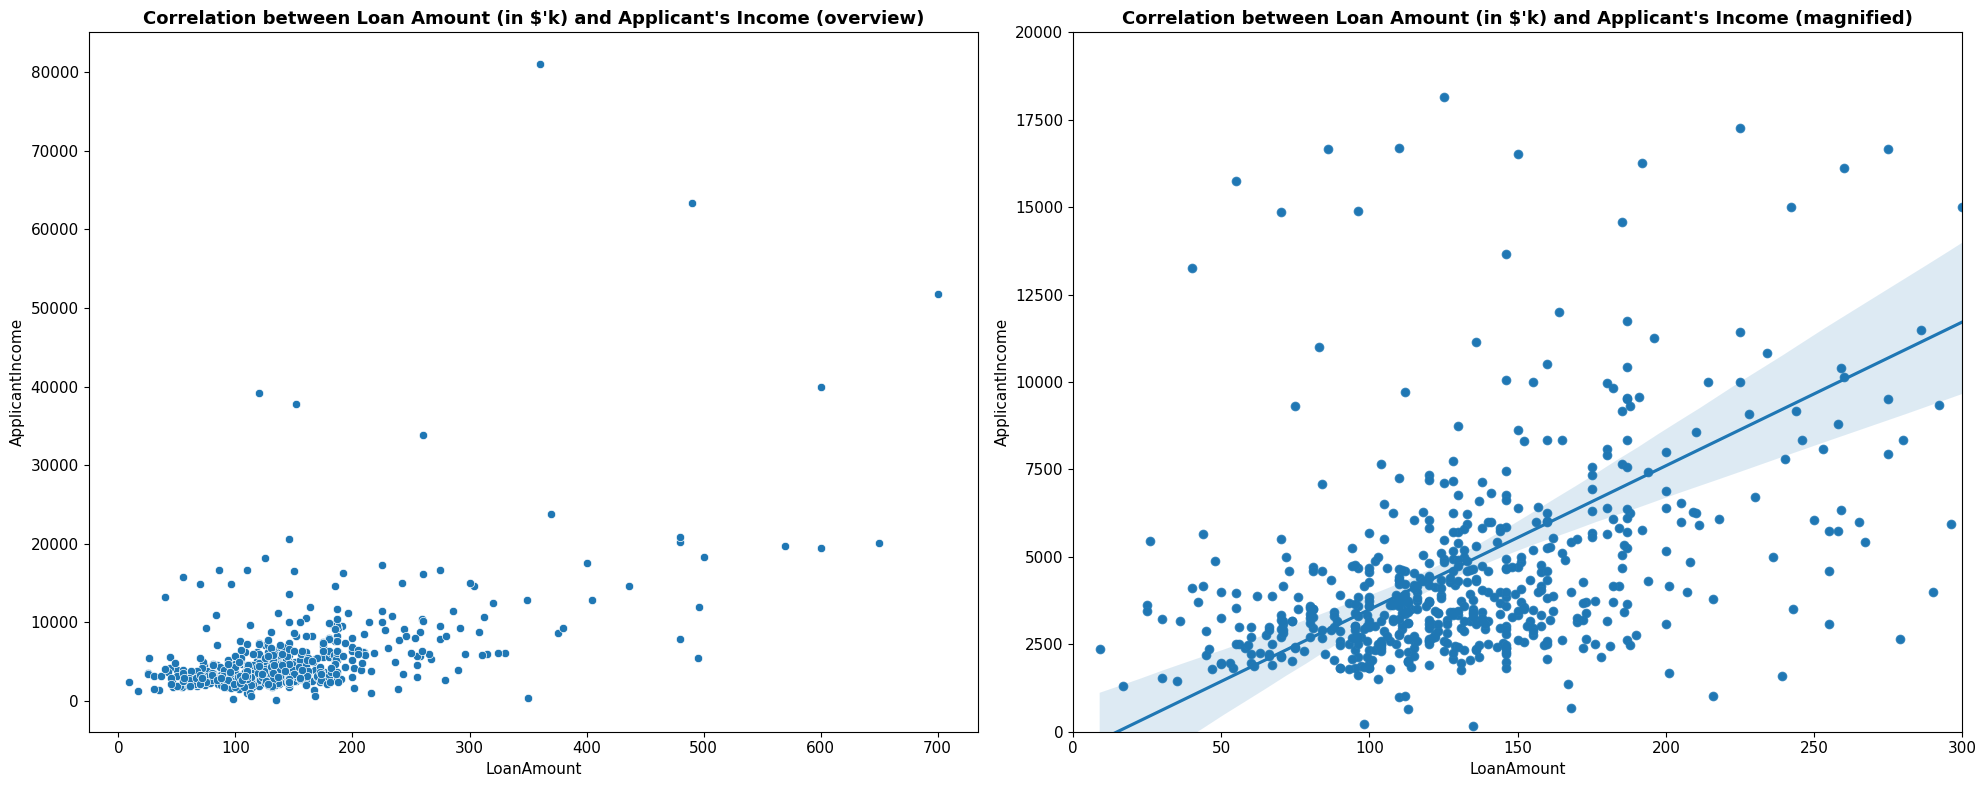

In [18]:
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 11})

plt.subplot(1,2,1)
ax = sns.scatterplot(target_data, x= 'LoanAmount', y= 'ApplicantIncome')
ax.set_title("Correlation between Loan Amount (in $'k) and Applicant's Income (overview)" 
             , fontweight= 'bold'
             , fontsize = 13 )

plt.subplot(1,2,2)
ax = sns.scatterplot(target_data, x= 'LoanAmount', y= 'ApplicantIncome')
sns.regplot(target_data,x = 'LoanAmount', y='ApplicantIncome', ax=plt.gca())
ax.set_ylim([0,20000])
ax.set_xlim([0,300])
ax.set_title("Correlation between Loan Amount (in $'k) and Applicant's Income (magnified)"
             , fontweight= 'bold'
             , fontsize = 13 )

plt.tight_layout()
plt.show()

#### Inference:
- We can infer from the graphs above that, applicant's with higher incomes tend to apply for higher loan amounts.

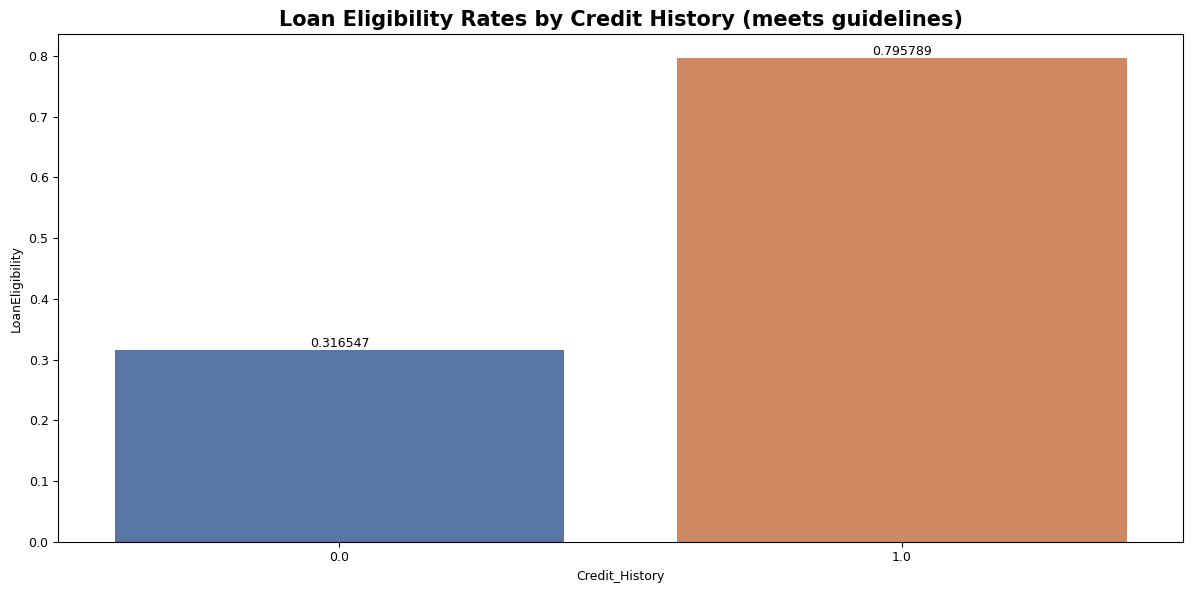

In [19]:
target_data = loans[[item for item in loans.columns]]
target_data['LoanEligibility'] = [int(item=='Y') for item in loans['Loan_Status']]

plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 9})

td = target_data[['Credit_History','LoanEligibility']].groupby(by='Credit_History').mean().reset_index()
ax =sns.barplot(data = td
                , x= 'Credit_History'
                ,y= 'LoanEligibility'
                , palette='deep')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title("Loan Eligibility Rates by Credit History (meets guidelines)"
             , fontweight = 'bold'
             , fontsize = 15)

plt.tight_layout()
plt.show()

#### Inference:
- The graph above shows that if the loan applicant's credit history is not meeting guidelines, the chance of him/her being eligible for a loan is close to 30 percent. On the other hand, if him/her is meeting the guidelines, that chance becomes close to 80 percent (a rough 50 percent difference).

### Step 4: Feature Engineering, Selections and Data Preparations

#### Create Dummy Variables for Categorical Features

We will create new binary variables that will replace the existing categorical variables to fit into the regression models. Since, `Loan_Status` shows to feature boolean values, we will modify it to become a binary variable

In [20]:
for item in loans:
    if loans[item].dtypes == 'object':
        print(item)

Gender
Married
Education
Self_Employed
Property_Area
Loan_Status


In [21]:
loans['Loan_Status'] = [int(item == 'Y') for item in loans['Loan_Status']]

# create a new variable from loan status 
def createDummyVariables(data, column):
    for i in range(0,len(data[column].unique())-1):
        item  = data[column].unique()[i]
        pts = []
        for point in data[column]:
            if point == item:
                pts.append(1)
            else: pts.append(0)
        data['is'+ column.capitalize() +item.capitalize()] = pts

for item in loans:
    if loans[item].dtypes == 'object':
        createDummyVariables(loans, item)


for item in loans:
    if loans[item].dtypes == 'object':
        loans.drop(item, axis = True, inplace = True)

loans

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,isGenderMale,isMarriedNo,isEducationGraduate,isSelf_employedNo,isProperty_areaUrban,isProperty_areaRural
0,0,5849,0.0,146.0,360.0,1.0,1,1,1,1,1,1,0
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,0
3,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,1,1,0
4,0,6000,0.0,141.0,360.0,1.0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,1,0,1,1,1,0,1
610,3,4106,0.0,40.0,180.0,1.0,1,1,0,1,1,0,1
611,1,8072,240.0,253.0,360.0,1.0,1,1,0,1,1,1,0
612,2,7583,0.0,187.0,360.0,1.0,1,1,0,1,1,1,0


#### Create an Loan-to-Income Ratio variable

This variable measures how much high the loan payment amount is in proportion to the applicant's income. Since we don't have disposable income data, we will use the combined income of the applicant's income and coapplicant's income.

In [22]:
# let's create a new variable called "CombinedIncome" that combines the applicant's and coapplicant's income
loans['CombinedIncome'] = loans['ApplicantIncome'] + loans['CoapplicantIncome']

# create the loan-to-income variable
# note: loan amount is in thousands and income is in a monthly basis
loans['LoanToIncome'] = (loans['LoanAmount'] * 1000) / (loans['CombinedIncome'] * 12)

loans

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,isGenderMale,isMarriedNo,isEducationGraduate,isSelf_employedNo,isProperty_areaUrban,isProperty_areaRural,CombinedIncome,LoanToIncome
0,0,5849,0.0,146.0,360.0,1.0,1,1,1,1,1,1,0,5849.0,2.080128
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,6091.0,1.751218
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,0,3000.0,1.833333
3,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,1,1,0,4941.0,2.023882
4,0,6000,0.0,141.0,360.0,1.0,1,1,1,1,1,1,0,6000.0,1.958333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,1,0,1,1,1,0,1,2900.0,2.040230
610,3,4106,0.0,40.0,180.0,1.0,1,1,0,1,1,0,1,4106.0,0.811820
611,1,8072,240.0,253.0,360.0,1.0,1,1,0,1,1,1,0,8312.0,2.536493
612,2,7583,0.0,187.0,360.0,1.0,1,1,0,1,1,1,0,7583.0,2.055035


### Step 5: Develop and Test the Models

#### Split the data into training and testing sets

Training and testing sets split will be 80% and 20% of the whole dataset respectively. We will also perform z-score scaling scale the features so that the values has a mean of 0 and a standard deviation of 1. Scaling helps to prevent some features from dominating or having undue influence on the model training process. We will scale only the numerical features and not the binary ones.

In [23]:
from sklearn.model_selection import train_test_split
# numerical features will be scaled
X_numerical= loans[[item for item in loans.columns 
                    if (item != 'Loan_Status') & (len(loans[item].unique())>2) ]]

# it's not necessary to scale binary features
X_binary = loans[[item for item in loans.columns 
                  if (item != 'Loan_Status') & (len(loans[item].unique())<=2) ]]

y = loans['Loan_Status']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)
X = np.hstack((X_scaled, X_binary))

feature_names = []
for item in X_numerical.columns:
    feature_names.append(item)
for item in X_binary.columns:
    feature_names.append(item)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#### Model 1: Simple Logistic Regression
We will start with a simple logistic regression model. Here is a little information, a mathematical formula and graph, on logistic regression. 

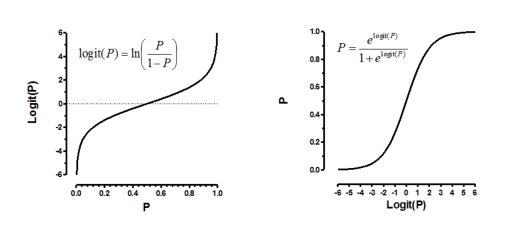

In [24]:
from matplotlib import image as mpimg
image_path = 'images/logit.png'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

Cross-Validation Scores: [0.76       0.7755102  0.81632653 0.73469388 0.7755102  0.69387755
 0.75510204 0.67346939 0.79591837 0.81632653]
Average Cross-Validation Score: 0.7596734693877552


Accuracy: 0.7560975609756098
Precision: 0.7741935483870968
Recall: 0.8888888888888888
F1: 0.8275862068965517


              precision    recall  f1-score   support

           0       0.70      0.50      0.58        42
           1       0.77      0.89      0.83        81

    accuracy                           0.76       123
   macro avg       0.74      0.69      0.71       123
weighted avg       0.75      0.76      0.74       123

Confusion Matrix:
[[21 21]
 [ 9 72]]


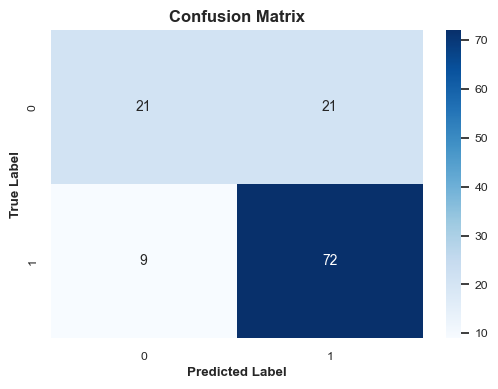

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the logistic regression model
model = LogisticRegression()

# Perform cross-validation with 10 folds
cv_scores = cross_val_score(model, X_train, y_train, cv=10)

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))
print('\n')

# Train the model on the entire dataset (you can use X_train and y_train instead if already split)
model.fit(X_train, y_train)

# Make predictions on the test set (you can use X_test and y_test instead if already split)
y_pred = model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1:", f1)
print('\n')

# Print the classification report (precision, recall, F1-score, support)
print(classification_report(y_test, y_pred))

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix using seaborn
sns.set(font_scale=0.8)  # Adjust the font scale for better visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 10})
plt.xlabel("Predicted Label", fontweight ='bold')
plt.ylabel("True Label", fontweight ='bold')
plt.title("Confusion Matrix", fontweight= 'bold', fontsize = 12)
plt.show()

#### Results and Takeaways:
- The predictive model shows to have an accuracy of roughly 75%, tested both on the testing dataset and the cross validation training datasets. The precision, recall and f1_score are roughly 77%, 88% and 82% respectively.
- While the results is OK, there are excessive features in the model that we can eliminate. Thus, we will perform dimensionality reduction on the model, train a new logistic regression and observe the result.

#### Model 2: Modified Logistic Regression
We will select only a few features based on the ANOVA F-value for each future with respect to the target variable. 

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X is your feature matrix and y is the corresponding labels
selector = SelectKBest(score_func=f_classif, k=3)
X_reduced = selector.fit_transform(X, y)

# Get the boolean mask of selected features
selected_features_mask = selector.get_support()

# Get the names of the selected features
selected_feature_names = np.array(feature_names)[selected_features_mask]

print("Selected feature names: ")
for i in range(0,len(selected_feature_names)):
    print(f"   Feature {i+1}:",selected_feature_names[i])

Selected feature names: 
   Feature 1: LoanToIncome
   Feature 2: Credit_History
   Feature 3: isProperty_areaRural


Cross-Validation Scores: [0.78       0.79591837 0.81632653 0.71428571 0.83673469 0.67346939
 0.75510204 0.67346939 0.7755102  0.79591837]
Average Cross-Validation Score: 0.761673469387755


Accuracy: 0.7967479674796748
Precision: 0.7978723404255319
Recall: 0.9259259259259259
F1: 0.8571428571428572


              precision    recall  f1-score   support

           0       0.79      0.55      0.65        42
           1       0.80      0.93      0.86        81

    accuracy                           0.80       123
   macro avg       0.80      0.74      0.75       123
weighted avg       0.80      0.80      0.79       123

Confusion Matrix:
[[23 19]
 [ 6 75]]


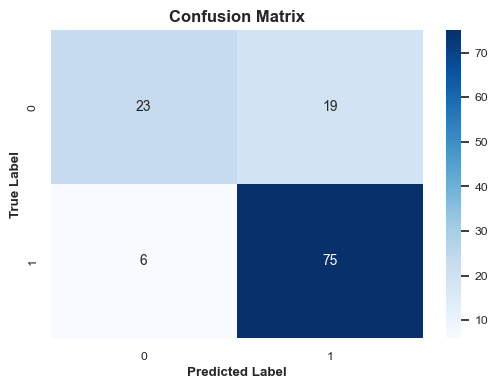

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=123)

# Create the logistic regression model
model = LogisticRegression()

# Perform cross-validation with 10 folds
cv_scores = cross_val_score(model, X_train, y_train, cv=10)

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))
print('\n')

# Train the model on the entire dataset (you can use X_train and y_train instead if already split)
model.fit(X_train, y_train)

# Make predictions on the test set (you can use X_test and y_test instead if already split)
y_pred = model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1:", f1)
print('\n')

# Print the classification report (precision, recall, F1-score, support)
print(classification_report(y_test, y_pred))

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix using seaborn
sns.set(font_scale=0.8) 
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 10})
plt.xlabel("Predicted Label", fontweight ='bold')
plt.ylabel("True Label", fontweight ='bold')
plt.title("Confusion Matrix", fontweight= 'bold', fontsize = 12)
plt.show()

#### Results and Takeaway:
- We have found that all the performance metrics have improved after we performed dimensionality reduction on the model.
- We have achieved an approximate 93% recall which means if a loan application is eligible, the model predicts it to be eligible 93% of the time.
- We have achieved an accuracy, precision and f1_score at about 80%, 80% and 86% respectively (rounded). 

### **Answering the Business Problem**

##### **Most Significant Features:**
Based on the ANOVA F-value of all the features, the following (in brackets are the original ones) are the most significant features:
- `LoanToIncome` (LoanAmount, ApplicantIncome and CoapplicantIncome)
- `Credit_History` (Credit_History)
- `isProperty_areaRural` (Property_Area)

##### **Additional Profits Made:**
To answer this question, let's consider a scenario.

Dream Housing Finance Company will be approving the loans contained in the testing set ONLY (the dataset that was splitted during the model development process). The cost of approving a loan that is ineligible is 5% of the average loan amount and the profit gained from approving a loan that is 10% of the average loan amount. The company will not be losing or gaining anything from not approving.

In this case, we will be performing the following:
- Calculate the average loan amount (of all loans)
- Perform Cost-Benefit analysis, comparing the model's prediction and random prediction using confusion matrices

In [28]:
# Average Loan Amount (convert from $'k to $)
average_loan_amount = (loans['LoanAmount'].mean()*1000).round(2)
print("The average loan amount is : $"+ str(average_loan_amount))
print("The number of loans in the testing set is", len(y_test), "loans")

The average loan amount is : $146397.39
The number of loans in the testing set is 123 loans


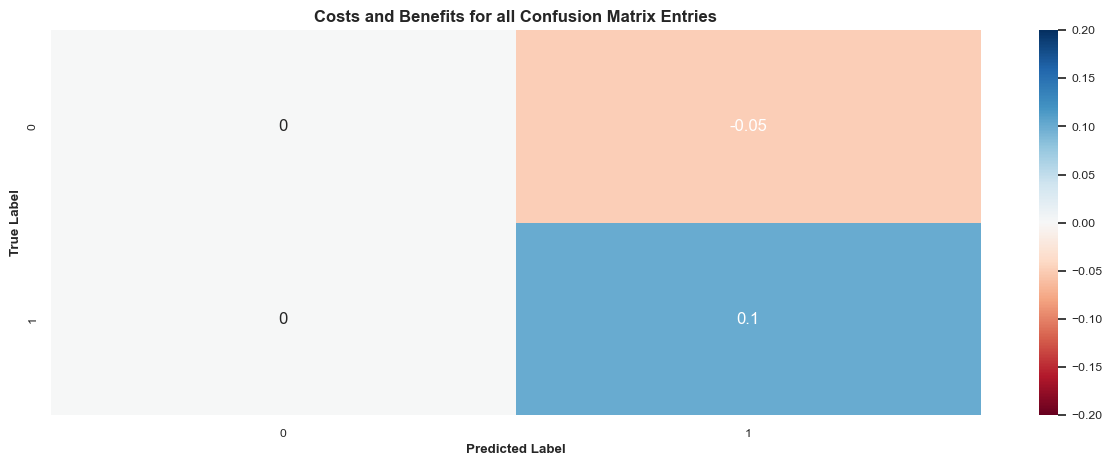

In [29]:
# Cost-Benefit Confusion Matrix
cost_ben_conf_matrix = [[0 , -0.05]
                        ,[0, 0.1]]
sns.set(font_scale=0.8) 
plt.figure(figsize=(15,5))
ax= sns.heatmap(cost_ben_conf_matrix, annot=True, cmap="RdBu", annot_kws={"size": 12})
ax.collections[0].set_clim(-0.2,0.2) 
plt.xlabel("Predicted Label", fontweight ='bold')
plt.ylabel("True Label", fontweight ='bold')
plt.title("Costs and Benefits for all Confusion Matrix Entries", fontweight= 'bold', fontsize = 12)
plt.show()

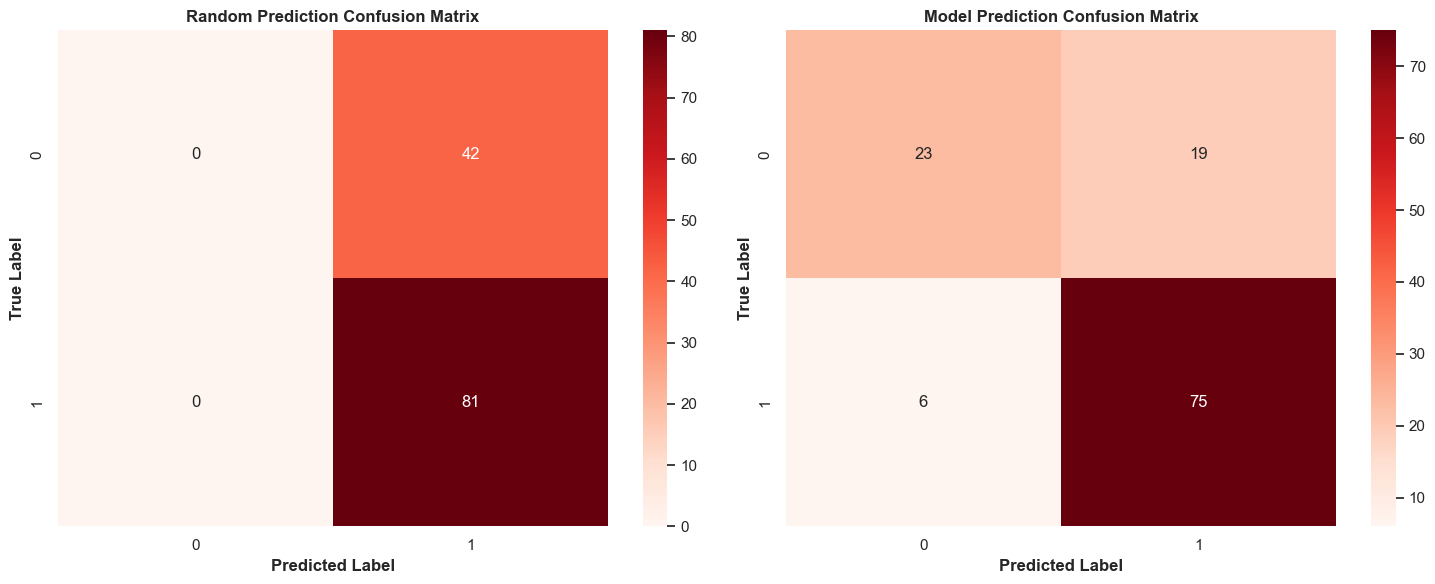

In [30]:
# Plot the confusion matrices for both the model's prediction result and random prediction result
y_random = len(y_pred)*[1]
random_conf_matrix = confusion_matrix(y_test, y_random)
sns.set(font_scale=1) 
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
sns.heatmap(random_conf_matrix, annot=True, fmt="d", cmap="Reds", annot_kws={"size": 12})
plt.xlabel("Predicted Label", fontweight ='bold')
plt.ylabel("True Label", fontweight ='bold')
plt.title("Random Prediction Confusion Matrix", fontweight= 'bold', fontsize = 12)

plt.subplot(1,2,2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", annot_kws={"size": 12})
plt.xlabel("Predicted Label", fontweight ='bold')
plt.ylabel("True Label", fontweight ='bold')
plt.title("Model Prediction Confusion Matrix", fontweight= 'bold', fontsize = 12)

plt.tight_layout()
plt.show()

In [31]:
# Find the profits obtain from each prediction methods
# Calculate profits from random prediction
random_pred_profit = (
    random_conf_matrix[0][0] * cost_ben_conf_matrix[0][0] * average_loan_amount) + (
        random_conf_matrix[0][1] * cost_ben_conf_matrix[0][1] * average_loan_amount)+ (
            random_conf_matrix[1][0] * cost_ben_conf_matrix[1][0] * average_loan_amount) + (
                random_conf_matrix[1][1] * cost_ben_conf_matrix[1][1] * average_loan_amount)

# Calculate profits from the model's prediction
model_pred_profit = (conf_matrix[0][0] * cost_ben_conf_matrix[0][0] * average_loan_amount) + (
    conf_matrix[0][1] * cost_ben_conf_matrix[0][1] * average_loan_amount)+ (
        conf_matrix[1][0] * cost_ben_conf_matrix[1][0] * average_loan_amount) + (
            random_conf_matrix[1][1] * cost_ben_conf_matrix[1][1] * average_loan_amount)


print("Profit or Loss from random prediction: $"+ str(random_pred_profit.round(0)))
print("Profit or Loss from the model's prediction: $"+ str(model_pred_profit.round(0)))

print("The additional profit gained from the model is $"+ str((model_pred_profit - random_pred_profit).round(0)))

Profit or Loss from random prediction: $878384.0
Profit or Loss from the model's prediction: $1046741.0
The additional profit gained from the model is $168357.0


##### Resolution:
Therefore, by using the predictive model instead of random guessing, in a testing scenario of *123* loan applications and average loan amount of *$146,397.39*, Dream Housing Finance Company will have made an additional profit of **$168,357.00**